## Project Scenario: 
### You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following:

1. Is there a significant difference in the median value of houses bounded by the Charles river or not?

2. Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

3. Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

4. What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?


### Importing the necessary python libraries 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime
import scipy.stats

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)

np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


### Loading the Data Set

In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


### Exploratory Data Analysis (getting familiar with the data)

In [5]:
boston_df.info


<bound method DataFrame.info of      Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO  LSTAT  MEDV
0             0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0     15.3   4.98  24.0
1             1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0     17.8   9.14  21.6
2             2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0     17.8   4.03  34.7
3             3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0     18.7   2.94  33.4
4             4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0     18.7   5.33  36.2
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...    ...      ...    ...   ...
501         501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0     21.0   9.67  22.4
502         502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0     21.0   9.08  20.6
503         50

In [6]:
boston_df.describe


<bound method NDFrame.describe of      Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO  LSTAT  MEDV
0             0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0     15.3   4.98  24.0
1             1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0     17.8   9.14  21.6
2             2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0     17.8   4.03  34.7
3             3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0     18.7   2.94  33.4
4             4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0     18.7   5.33  36.2
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...    ...      ...    ...   ...
501         501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0     21.0   9.67  22.4
502         502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0     21.0   9.08  20.6
503         

## Data Visualization

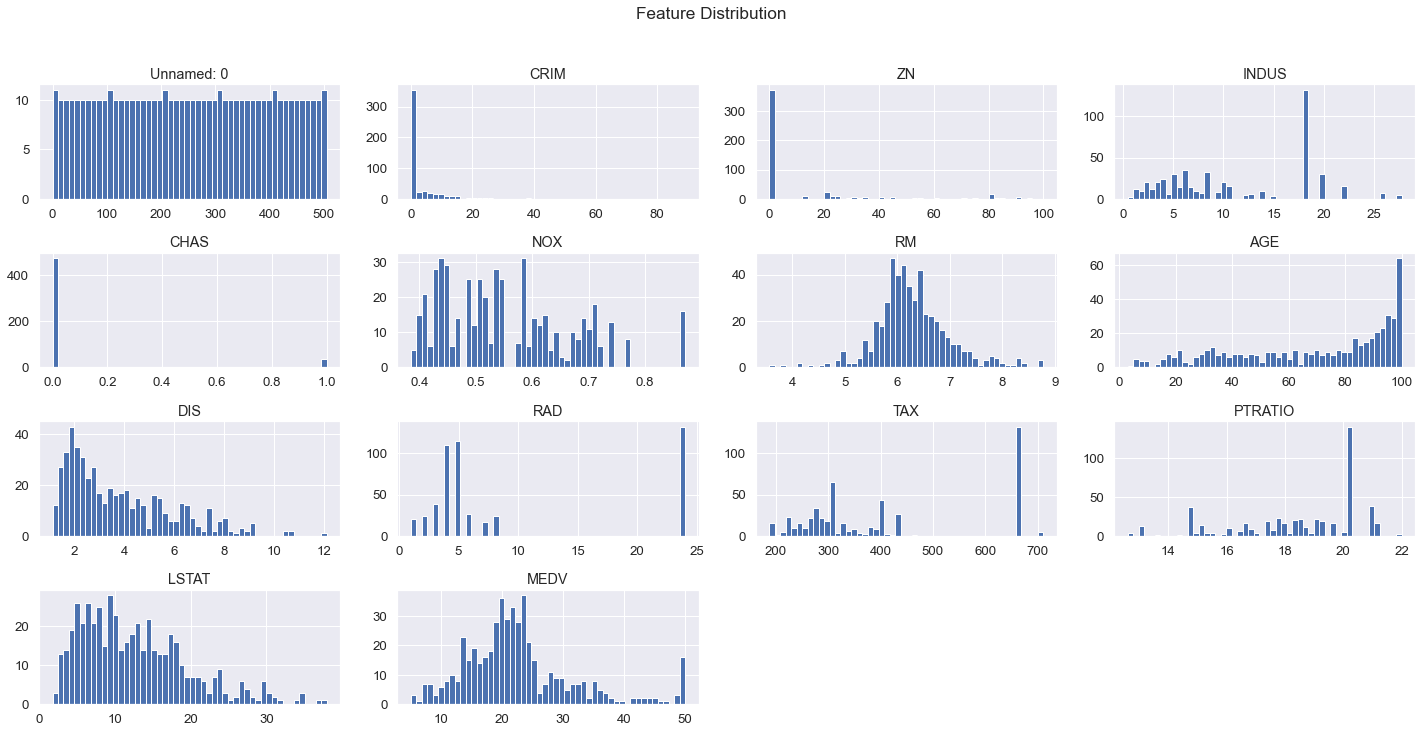

In [9]:
#Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'], dtype='object')
boston_df.hist(bins=50, figsize=(20,10))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

In [8]:
boston_df.loc[(boston_df["AGE"] <= 35),'age_group'] = '35 years and younger'
boston_df.loc[(boston_df["AGE"] > 35) & (boston_df["AGE"]<70),'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df["AGE"] >= 70),'age_group'] = '70 years and older'
boston_df


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,between 35 and 70 years
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,70 years and older
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,70 years and older
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,70 years and older


## Descriptive Statistics and Visualizations

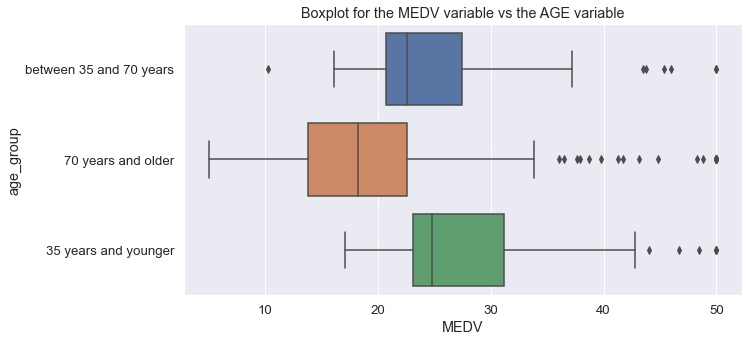

In [10]:
plt.figure(figsize=(10,5))
sns.boxplot(x=boston_df.MEDV, y=boston_df.age_group, data=boston_df)
plt.title("Boxplot for the MEDV variable vs the AGE variable")
plt.show()

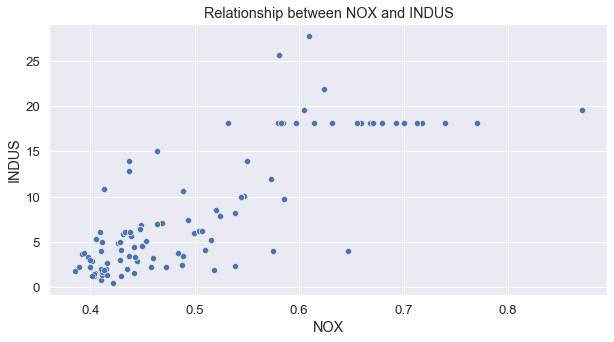

In [11]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=boston_df.NOX, y=boston_df.INDUS, data=boston_df)
plt.title("Relationship between NOX and INDUS")
plt.show()

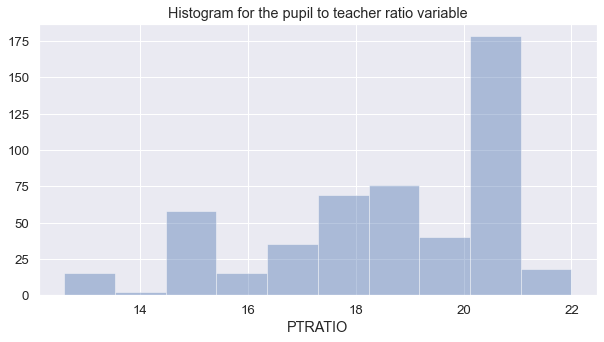

In [12]:
plt.figure(figsize=(10,5))
sns.distplot(a=boston_df.PTRATIO,bins=10, kde=False)
plt.title("Histogram for the pupil to teacher ratio variable")
plt.show()

## Hypothesis testing:


### 1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)?

Null Hypothesis(H0): Both average MEDV are the same

Alternative Hypothesis(H1): Both average MEDV are NOT the same

In [15]:
print(boston_df["CHAS"].value_counts())

a = boston_df[boston_df["CHAS"] == 0]["MEDV"]
b = boston_df[boston_df["CHAS"] == 1]["MEDV"]
scipy.stats.ttest_ind(a,b,axis=0,equal_var=True)


0.0    471
1.0     35
Name: CHAS, dtype: int64


Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

### Result: Since p-value more than alpha value of 0.05, we failed to reject null hypothesis since there is NO statistical significance.


### 2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)


In [16]:
print(boston_df["AGE"].value_counts())
boston_df.loc[(boston_df["AGE"] <= 35),'age_group'] = '35 years and younger'
boston_df.loc[(boston_df["AGE"] > 35) & (boston_df["AGE"]<70),'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df["AGE"] >= 70),'age_group'] = '70 years and older'
print(boston_df)

100.0    43
95.4      4
96.0      4
98.2      4
97.9      4
         ..
58.4      1
74.4      1
73.4      1
33.1      1
89.3      1
Name: AGE, Length: 356, dtype: int64
     Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO  LSTAT  MEDV                age_group
0             0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0     15.3   4.98  24.0  between 35 and 70 years
1             1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0     17.8   9.14  21.6       70 years and older
2             2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0     17.8   4.03  34.7  between 35 and 70 years
3             3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0     18.7   2.94  33.4  between 35 and 70 years
4             4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0     18.7   5.33  36.2  between 35 and 70 years
..          ...      ...   ...    ...   ...  

In [17]:
low = boston_df[boston_df["age_group"] == '35 years and younger']["MEDV"]
mid = boston_df[boston_df["age_group"] == 'between 35 and 70 years']["MEDV"]
high = boston_df[boston_df["age_group"] == '70 years and older']["MEDV"]
f_stats,p_value = scipy.stats.f_oneway(low,mid,high,axis=0)
print("F-Statistic={0}, P-value={1}".format(f_stats,p_value))


F-Statistic=36.40764999196599, P-value=1.7105011022702984e-15



### 3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
### Hypotesis: 

H0: NOX is not correlated with INDUS

H1: NOX is correlated with INDUS

In [19]:
pearson,p_value = scipy.stats.pearsonr(boston_df["NOX"],boston_df["INDUS"])
print("Pearson Coefficient value={0}, P-value={1}".format(pearson,p_value))

Pearson Coefficient value=0.7636514469209151, P-value=7.913361061238693e-98


### 3.  What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

### Hypothesis

Null Hypothesis: weighted distances to five Boston employment centres are not related to median value

Alternative Hypothesis: weighted distances to five Boston employment centres are related to median value#


In [22]:
print(boston_df.columns)
y = boston_df['MEDV']
x = boston_df['DIS']
x= sm.add_constant(x)
results = sm.OLS(y,x).fit()
print(np.sqrt(0.062))

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV', 'age_group'], dtype='object')
0.24899799195977465


### Result: 

The square root of R-squared is 0.25, which implies weak correlation between both features


### Correlation

            Unnamed: 0      CRIM        ZN     INDUS      CHAS       NOX        RM       AGE       DIS       RAD       TAX   PTRATIO     LSTAT      MEDV
Unnamed: 0    1.000000  0.407407 -0.103393  0.399439 -0.003759  0.398736 -0.079971  0.203784 -0.302211  0.686002  0.666626  0.291074  0.258465 -0.226604
CRIM          0.407407  1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734 -0.379670  0.625505  0.582764  0.289946  0.455621 -0.388305
ZN           -0.103393 -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537  0.664408 -0.311948 -0.314563 -0.391679 -0.412995  0.360445
INDUS         0.399439  0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779 -0.708027  0.595129  0.720760  0.383248  0.603800 -0.483725
CHAS         -0.003759 -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518 -0.099176 -0.007368 -0.035587 -0.121515 -0.053929  0.175260
NOX           0.398736  0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188

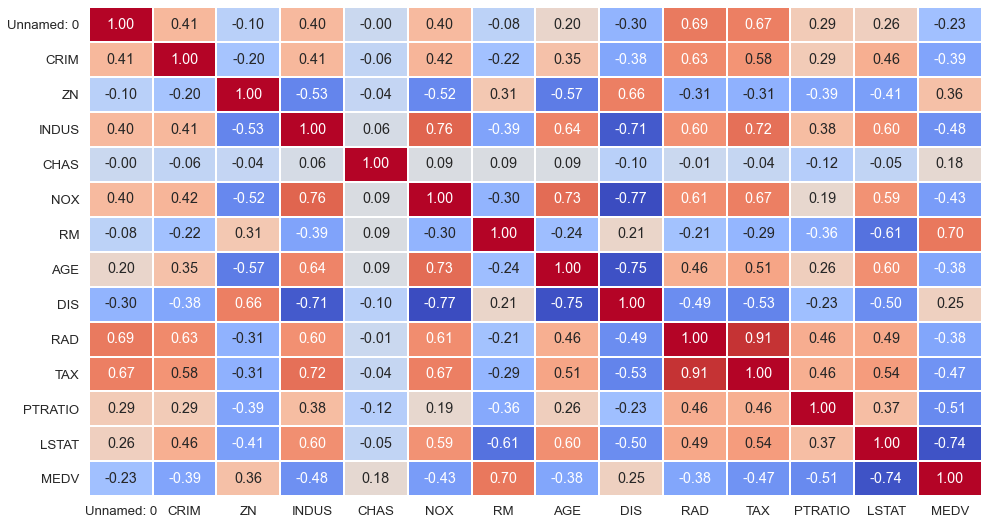

In [24]:
print(boston_df.corr())
plt.figure(figsize=(16,9))
sns.heatmap(boston_df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2, cbar=False)
plt.show()